In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/netflix.csv')

1) Defining Problem Statement and Analysing basic metrics

About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries




KPIs to be considered:
 1) Subscriber Increase
 2) Revenue Growth
 3) Content Quality





In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.drop('description',axis=1,inplace=True)

2) Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [ ]:
df.rename(columns={'listed_in':'genre'}, inplace=True)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.duplicated().sum()

np.int64(0)

3) Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
columns = ['type', 'title', 'director', 'cast', 'country', 'genre', 'date_added', 'release_year', 'rating', 'duration']
for col in columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("*"*50)

Value counts for column 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
**************************************************
Value counts for column 'title':
title
Zubaan                                 1
Dick Johnson Is Dead                   1
Blood & Water                          1
Ganglands                              1
Jailbirds New Orleans                  1
                                      ..
Bangkok Breaking                       1
Vendetta: Truth, Lies and The Mafia    1
The Starling                           1
The Great British Baking Show          1
Sankofa                                1
Name: count, Length: 8807, dtype: int64
**************************************************
Value counts for column 'director':
director
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               16
Jay Karas                  14
                           ..
James Brown                 1
Ivona Juka        

Preprocessing Data

In [ ]:
date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
       "Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
        "Frasier" : 'April 1, 2015',
        "Friends" : 'January 1, 2015',
        "Gunslinger Girl" : 'January 4, 2016',
        "Kikoriki" : 'July 6, 2017',
        "La Familia P. Luche" : 'June 1, 2015',
        "Maron" : 'November 2, 2018',
        "Red vs. Blue" : 'March 21, 2015',
        "The Adventures of Figaro Pho": 'January 1, 2016'}

In [ ]:
df['date_added'] = df['date_added'].fillna(df['title'].map(date))

In [ ]:
ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
         "Gargantia on the Verdurous Planet" : 'TV-PG',
          "Little Lunch" : 'TV-Y',
          "My Honor Was Loyalty" : 'PG-13',
          "Louis C.K. 2017" : 'TV-MA',
          "Louis C.K.: Hilarious" : 'TV-MA',
          "Louis C.K.: Live at the Comedy Store":'TV-MA'}

In [ ]:
df['rating'] = df['rating'].fillna(df['title'].map(ratings))

In [ ]:
time = {"Louis C.K. 2017" : '74 min',
          "Louis C.K.: Hilarious" : '83 min',
          "Louis C.K.: Live at the Comedy Store":'65 min'}

In [ ]:
df['duration'] = df['duration'].fillna(df['title'].map(time))

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')


df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month_name()
df['day'] = df['date_added'].dt.day_name()
df['quarter'] = df['date_added'].dt.quarter
df['month_no'] = df['date_added'].dt.month

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday,3,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday,3,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,Friday,3,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday,3,9


In [ ]:
df1 = df.copy()
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday,3,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday,3,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,Friday,3,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday,3,9


In [ ]:
# data extracted using ombd api,code for the same is in reference section
dir = pd.read_csv('/content/drive/MyDrive/director_title.csv')

In [ ]:
dir.reset_index(inplace=True,drop=True)

In [ ]:
dir.head()

,title,director
0,Blood & Water,NaN
1,Jailbirds New Orleans,NaN
2,Kota Factory,NaN
3,Crime Stories: India Detectives,NaN
4,Dear White People,Justin Simien


In [ ]:
director_dict = dir.set_index('title')['director'].to_dict()
df1['director'] = df1['director'].fillna(df1['title'].map(director_dict))

In [ ]:
def check_replacement(before,after):
  nan_b4 = before.isna().sum()
  nan_a4 = after.isna().sum()
  print('NaN values before replacement:',nan_b4)
  print('-'*40)
  print('NaN values after replacement:', nan_a4)

In [ ]:
print(check_replacement(df['director'],df1['director']))

NaN values before replacement: 2634
----------------------------------------
NaN values after replacement: 2545
None


In [ ]:
# data extracted using ombd api,code for the same is in reference section
dir_tv = pd.read_csv('/content/drive/MyDrive/tv_shows_directors.csv')
dir_tv.head()

,Title,Director/Writer/Creator
0,Blood & Water,NaN
1,Jailbirds New Orleans,NaN
2,Kota Factory,"Saurabh Khanna, Arunabh Kumar, Raghav Subbu"
3,"Vendetta: Truth, Lies and The Mafia",Error or Not Found
4,Crime Stories: India Detectives,NaN


In [ ]:
dir_tv.rename(columns={'Title':'title','Director/Writer/Creator':'director'},inplace=True)
dir_tv.head()

,title,director
0,Blood & Water,NaN
1,Jailbirds New Orleans,NaN
2,Kota Factory,"Saurabh Khanna, Arunabh Kumar, Raghav Subbu"
3,"Vendetta: Truth, Lies and The Mafia",Error or Not Found
4,Crime Stories: India Detectives,NaN


In [ ]:
dir_tv['director'] = dir_tv['director'].replace('Error or Not Found', np.nan)

In [ ]:
dir_tv_dict = dir_tv.set_index('title')['director'].to_dict()
df1['director'] = df1['director'].fillna(df1['title'].map(dir_tv_dict))

In [ ]:
print(check_replacement(df['director'],df1['director']))

NaN values before replacement: 2634
----------------------------------------
NaN values after replacement: 2153
None


In [ ]:
#Data extracted using omdb api, code is in reference section
country_df = pd.read_csv('/content/drive/MyDrive/movie_countries2.csv')
country_df.head()

,Title,Country
0,Mr. Romantic,South Korea
1,Fifty Year Old Teenager,Kuwait
2,Lock Your Girls In,np.nan
3,Raya and Sakina,np.nan
4,Sayed the Servant,np.nan


In [ ]:
country_df.reset_index(inplace=True,drop=True)

In [ ]:
country_df.rename(columns={'Title':'title','Country':'country'},inplace=True)

In [ ]:
country_df.head()

,title,country
0,Mr. Romantic,South Korea
1,Fifty Year Old Teenager,Kuwait
2,Lock Your Girls In,np.nan
3,Raya and Sakina,np.nan
4,Sayed the Servant,np.nan


In [ ]:
country_dict = country_df.set_index('title')['country'].to_dict()
df1['country'] = df1['country'].fillna(df1['title'].map(country_dict))

In [ ]:
print(check_replacement(df['country'],df1['country']))

NaN values before replacement: 831
----------------------------------------
NaN values after replacement: 415
None


In [ ]:
country_dat2 = pd.read_csv('/content/drive/MyDrive/movie_countries (1).csv')

In [ ]:
country_dat2.head()

,title,country
0,Ganglands,France
1,Jailbirds New Orleans,United States
2,Midnight Mass,United States
3,My Little Pony: A New Generation,"United States, Ireland, Canada"
4,"Vendetta: Truth, Lies and The Mafia",NaN


In [ ]:
country_dat2.reset_index(inplace=True,drop=True)

In [ ]:
country_dat2.head()

,title,country
0,Ganglands,France
1,Jailbirds New Orleans,United States
2,Midnight Mass,United States
3,My Little Pony: A New Generation,"United States, Ireland, Canada"
4,"Vendetta: Truth, Lies and The Mafia",NaN


In [ ]:
countrydat_dict = country_dat2.set_index('title')['country'].to_dict()
df1['country'] = df1['country'].fillna(df1['title'].map(countrydat_dict))
df1['country'] = df1['country'].str.replace(r'\s+', ' ', regex=True)
x = df1['country'].mode()[0]
df1['country'].replace(' ',x)

,country
0,United States
1,South Africa
2,France
3,United States
4,India
...,...
8802,United States
8803,np.nan
8804,United States
8805,United States


In [ ]:
print(check_replacement(df['country'],df1['country']))

NaN values before replacement: 831
----------------------------------------
NaN values after replacement: 127
None


In [ ]:
# Data extracted using omdb api, code for the same is in reference section
cast_data = pd.read_csv('/content/drive/MyDrive/cast_title.csv')
cast_data.head()

,Title,Cast
0,Dick Johnson Is Dead,"Michael Hilow, Ana Hoffman, Dick Johnson"
1,Jailbirds New Orleans,NaN
2,"Vendetta: Truth, Lies and The Mafia",NaN
3,Crime Stories: India Detectives,"N. Shashi Kumar, B.N. Lohith, V. Dhananjaya"
4,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN


In [ ]:
cast_data.rename(columns={'Title':'title','Cast':'cast'},inplace=True)

In [ ]:
cast_data.columns

Index(['title', 'cast'], dtype='object')

In [ ]:
cast_dict = cast_data.set_index('title')['cast'].to_dict()
df1['cast'] = df1['cast'].fillna(df1['title'].map(cast_dict))

In [ ]:
print(check_replacement(df['cast'],df1['cast']))

NaN values before replacement: 825
----------------------------------------
NaN values after replacement: 273
None


In [ ]:
df2 = df1.copy()

In [ ]:
df2["director"] = df1["director"].str.split(", ")
df2["cast"] = df1["cast"].str.split(", ")
df2["country"] = df1["country"].str.split(", ")
df2["genre"] = df1["genre"].str.split(", ")

df2 = df2.explode(['director'])
df2 = df2.explode(['cast'])
df2 = df2.explode(['country'])
df2 = df2.explode(['genre'])
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Michael Hilow,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Ana Hoffman,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Dick Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,September,Friday,3,9
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2021,September,Friday,3,9


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213027 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       213027 non-null  object        
 1   type          213027 non-null  object        
 2   title         213027 non-null  object        
 3   director      173727 non-null  object        
 4   cast          212298 non-null  object        
 5   country       211424 non-null  object        
 6   date_added    213027 non-null  datetime64[ns]
 7   release_year  213027 non-null  int64         
 8   rating        213027 non-null  object        
 9   duration      213027 non-null  object        
 10  genre         213027 non-null  object        
 11  year          213027 non-null  int32         
 12  month         213027 non-null  object        
 13  day           213027 non-null  object        
 14  quarter       213027 non-null  int32         
 15  month_no      213027 non

In [ ]:
dir_g = df2.groupby(['country','genre'])
dir_g.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Michael Hilow,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Ana Hoffman,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Dick Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,September,Friday,3,9
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2021,September,Friday,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8797,s8798,TV Show,Zak Storm,NaN,Michael Johnston,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September,Thursday,3,9
8797,s8798,TV Show,Zak Storm,NaN,Jessica Gee-George,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September,Thursday,3,9
8797,s8798,TV Show,Zak Storm,NaN,Christine Marie Cabanos,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September,Thursday,3,9
8797,s8798,TV Show,Zak Storm,NaN,Christopher Smith,Indonesia,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September,Thursday,3,9


In [ ]:
replace_dir = lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)

df2['director'] = dir_g['director'].transform(replace_dir)

/tmp/ipython-input-1743286445.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replace_dir = lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)


In [ ]:
replace_director = lambda x: x if not pd.isna(x) else df2['director'].mode()[0]


df2['director'] = df2['director'].transform(replace_director)

In [ ]:
print(check_replacement(df1['director'],df2['director']))

NaN values before replacement: 2153
----------------------------------------
NaN values after replacement: 0
None


In [ ]:
replace_country = lambda x: x if not pd.isna(x) else df2['country'].mode()[0]
df2['country'] = df2['country'].transform(replace_country)


In [ ]:
print(check_replacement(df1['country'],df2['country']))

NaN values before replacement: 127
----------------------------------------
NaN values after replacement: 0
None


In [ ]:
replace_cast = lambda x: x if not pd.isna(x) else df2['cast'].mode()[0]


df2['cast'] = df2['cast'].transform(replace_cast)

In [ ]:
print(check_replacement(df1['cast'],df2['cast']))

NaN values before replacement: 273
----------------------------------------
NaN values after replacement: 0
None


Content Distribution

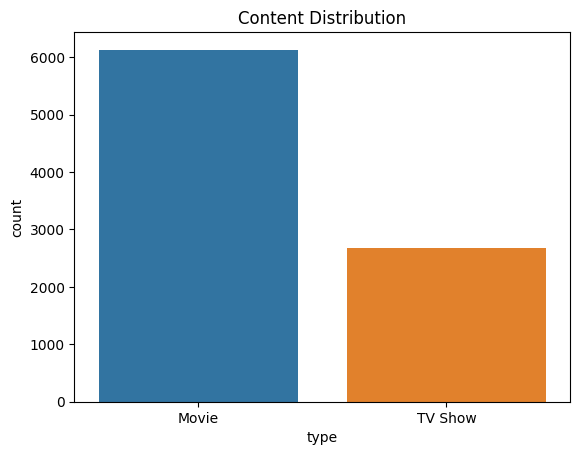

In [ ]:
sns.countplot(x = df['type'], hue=df['type'])
plt.title('Content Distribution')
plt.show()

Netflix has added more movies than tv shows for the given time period.

In [ ]:
y = df.groupby('year')[['type']].value_counts()
y = y.reset_index()

y= y.drop(index=0)
y

,year,type,count
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6
10,2015,Movie,56


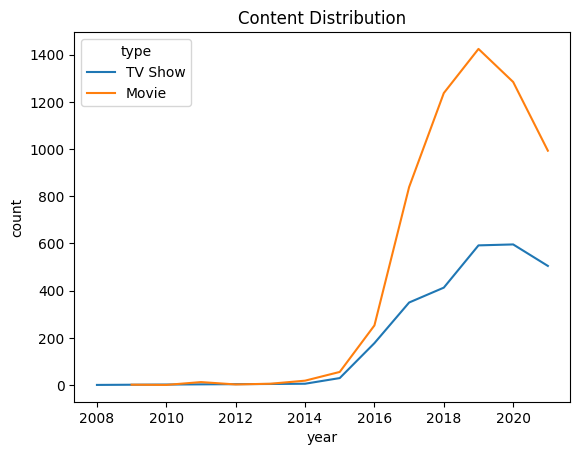

In [ ]:
sns.lineplot(data=y, x='year', y='count', hue='type')
plt.title('Content Distribution')
plt.show()

It's during the year 2019 mximum number of tv shows and movies were added to netflix platform.Due to absences of the high speed broadband and very low internet pentration in many parts of the world, globalisation was slow for netflix, although it started globalization in 2010, it took few years to deal with challenges like dealing with local regulations and adding content with more global appeal. which picked up from year 2016. Reference:https://hbr.org/2018/10/how-netflix-expanded-to-190-countries-in-7-years.

In [ ]:
y = df.groupby('year')[['type']].value_counts()
y = y.reset_index()

y

,year,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6


In [ ]:
df_movies = df[df['type'] == 'Movie']
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,2021,September,Friday,3,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday,3,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,September,Friday,3,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021,September,Thursday,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",2016,March,Wednesday,1,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,November,Wednesday,4,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019,November,Friday,4,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020,January,Saturday,1,1


In [ ]:
df_movies_per_year = df_movies.groupby('release_year')[['title']].count()
df_movies_per_year = df_movies_per_year.reset_index()
df_movies_per_year

,release_year,title
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


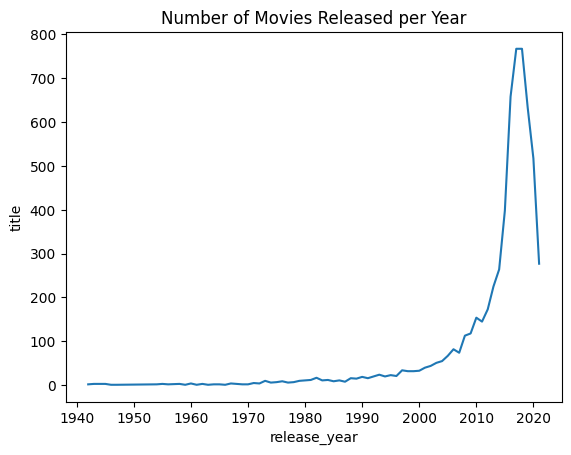

In [ ]:
sns.lineplot(data=df_movies_per_year, x='release_year', y='title')
plt.title('Number of Movies Released per Year')
plt.show()

There was an exponential growth in release of titles from year 2015 to 2019

In [ ]:
df_month = df.groupby('month_no')[['type']].value_counts()

df_month = df_month.reset_index()
df_month.sort_values(by='month_no', inplace=True)
df_month.iloc[1:,:]

,month_no,type,count
1,1,TV Show,195
2,2,Movie,382
3,2,TV Show,181
4,3,Movie,529
5,3,TV Show,214
6,4,Movie,550
7,4,TV Show,215
8,5,Movie,439
9,5,TV Show,193
10,6,Movie,492


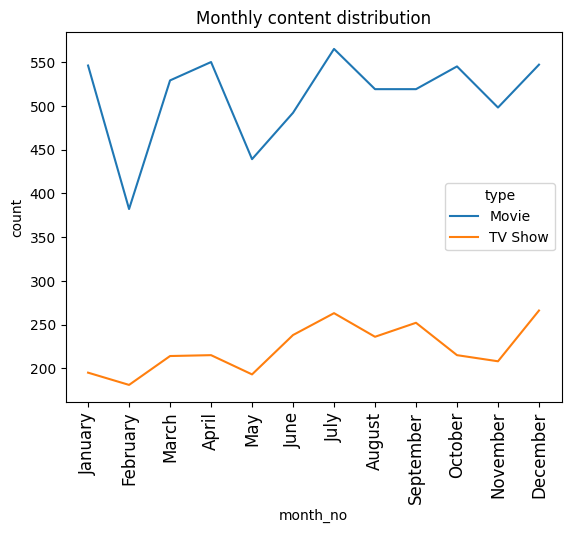

In [ ]:
g = sns.lineplot(data=df_month, x='month_no', y='count', hue='type')
g.set_xticks(range(1,13))
g.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October','November','December'])
plt.xticks(rotation=90,fontsize=12)
plt.title('Monthly content distribution')
plt.show()

March, April, July,August, september and decdember are the months where more content has been added compared to other months.

In [ ]:
df_day = df.groupby('day')[['type']].value_counts()

df_day = df_day.reset_index()
df_day.sort_values(by='day', inplace=True)
df_day.iloc[1:,:]

,day,type,count
1,Friday,TV Show,934
2,Monday,Movie,628
3,Monday,TV Show,227
4,Saturday,Movie,557
5,Saturday,TV Show,260
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1053
9,Thursday,TV Show,345
10,Tuesday,Movie,852


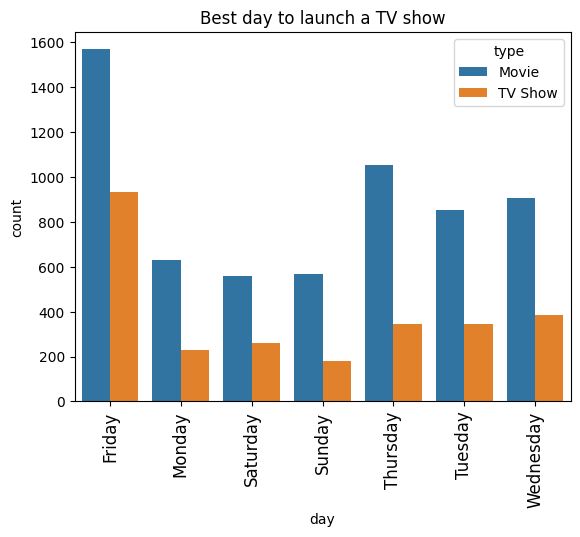

In [ ]:
g = sns.barplot(data=df_day, x='day', y='count', hue='type')
#g.set_xticks(range(1,8))
#g.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=90,fontsize=12)
plt.title('Best day to launch a TV show')
plt.show()

Best day to release the title is Friday.

Top 10 director

In [ ]:
movie_mask = df2['type'] == 'Movie'
tv_mask = df2['type'] == 'TV Show'

movie_df = df2[movie_mask]
tv_df = df2[tv_mask]

In [ ]:
dir_10_movie = movie_df.groupby(['director'])[['title']].nunique().rename(columns={'title':'movie_count'})
dir_10_movie
dir_10_movie = dir_10_movie.reset_index()


dir_10_movie.sort_values(by='movie_count', ascending=False, inplace=True)
dir_10_movie.head(10)

,director,movie_count
115,Akira Shigino,97
3452,Peter Spirer,26
1821,Jan Suter,23
3757,Robert Rodriguez,22
3631,Raúl Campos,19
384,Anurag Kashyap,19
2817,Martin Scorsese,18
4206,Steve Brill,18
4403,Tilak Shetty,17
4723,Youssef Chahine,15


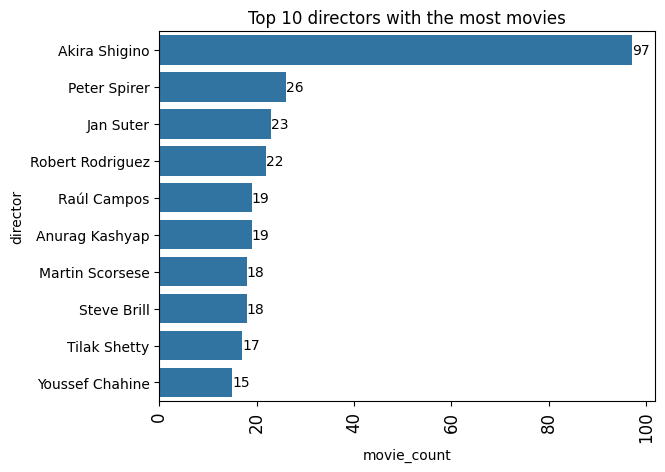

In [ ]:
ax = sns.barplot(data=dir_10_movie.head(10),x='movie_count', y='director',linewidth=0)
plt.xticks(rotation=90,fontsize=12)
plt.title('Top 10 directors with the most movies')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [ ]:
dir_10_tv = tv_df.groupby(['director'])[['title']].nunique().rename(columns={'title':'show_count'})
dir_10_tv
dir_10_tv = dir_10_tv.reset_index()


dir_10_tv.sort_values(by='show_count', ascending=False, inplace=True) # Changed 'title' to 'movie_count
dir_10_tv.head(10)

,director,show_count
19,Akira Shigino,639
454,Julian Fellowes,197
485,Ken Burns,165
323,Hilary Weisman Graham,164
800,Shin Won-ho,160
759,Ryan Murphy,149
907,Wataru Watanabe,135
356,James McTeigue,121
355,James Lee,117
190,Danny Cannon,101


Top 10 Actors


In [ ]:
movie_actor = df2[movie_mask]
tv_actor = df2[tv_mask]

In [ ]:
movie_act_10 = movie_actor.groupby(['cast'])[['title']].nunique().rename(columns={'title':'movie_count'})
movie_act_10
movie_act_10 = movie_act_10.reset_index()


movie_act_10.sort_values(by='movie_count', ascending=False, inplace=True) # Changed 'title' to 'movie_count
movie_act_10.head(10)

,cast,movie_count
1017,Alfred Molina,144
2195,Anupam Kher,42
22516,Shah Rukh Khan,35
17798,Naseeruddin Shah,32
18692,Om Puri,31
661,Akshay Kumar,30
12485,Julie Tejwani,28
18965,Paresh Rawal,28
1369,Amitabh Bachchan,28
3494,Boman Irani,27


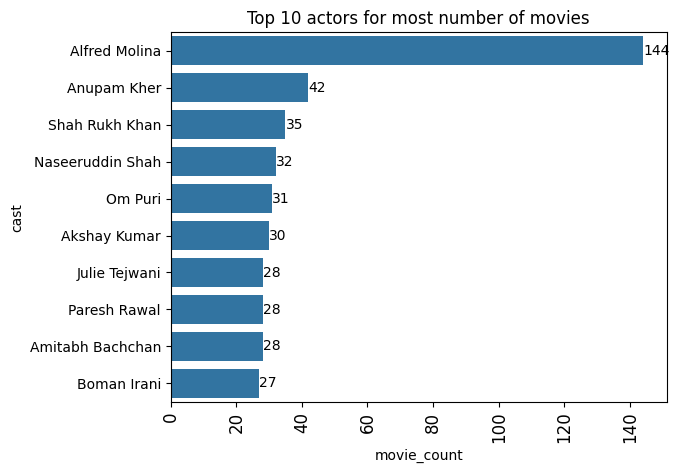

In [ ]:
ax = sns.barplot(data=movie_act_10.head(10),x='movie_count', y='cast',linewidth=0)
plt.xticks(rotation=90,fontsize=12)
plt.title('Top 10 actors for most number of movies')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [ ]:
tv_act_10 = tv_actor.groupby(['cast'])[['title']].nunique().rename(columns={'title':'show_count'})
tv_act_10
tv_act_10 = tv_act_10.reset_index()


tv_act_10.sort_values(by='show_count', ascending=False, inplace=True) # Changed 'title' to 'movie_count
tv_act_10.head(10)

,cast,show_count
513,Alfred Molina,145
13701,Takahiro Sakurai,25
15089,Yuki Kaji,19
2981,Daisuke Ono,17
261,Ai Kayano,17
7055,Junichi Suwabe,17
15073,Yuichi Nakamura,16
15005,Yoshimasa Hosoya,15
7012,Jun Fukuyama,15
3239,David Attenborough,14


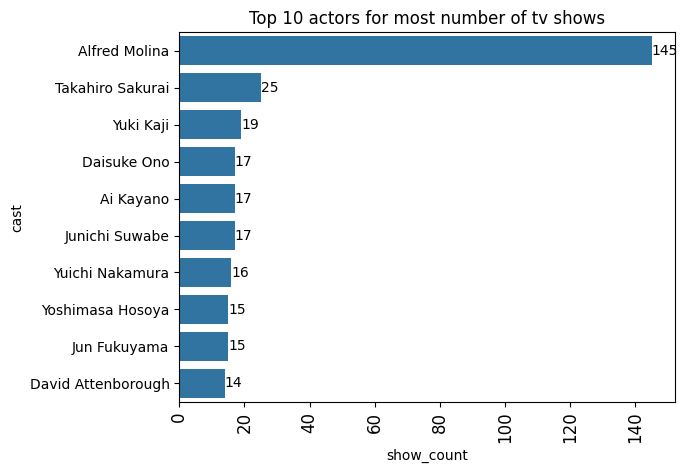

In [ ]:
ax = sns.barplot(data=tv_act_10.head(10),x='show_count', y='cast',linewidth=0)
plt.xticks(rotation=90,fontsize=12)
plt.title('Top 10 actors for most number of tv shows')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Top 10 Countries

In [ ]:
country_movie = df2[movie_mask]
country_tv = df2[tv_mask]

In [ ]:
country_movie_10 = country_movie.groupby(['country'])[['title']].nunique().rename(columns={'title':'movie_count'})
country_movie_10
country_movie_10 = country_movie_10.reset_index()


country_movie_10.sort_values(by='movie_count', ascending=False, inplace=True)

country_movie_ten = country_movie_10.head(11).drop(country_movie_10.index[7])
country_movie_ten


,country,movie_count
117,United States,2905
44,India,986
115,United Kingdom,543
21,Canada,332
35,France,314
37,Germany,190
102,Spain,175
52,Japan,136
24,China,119
66,Mexico,115


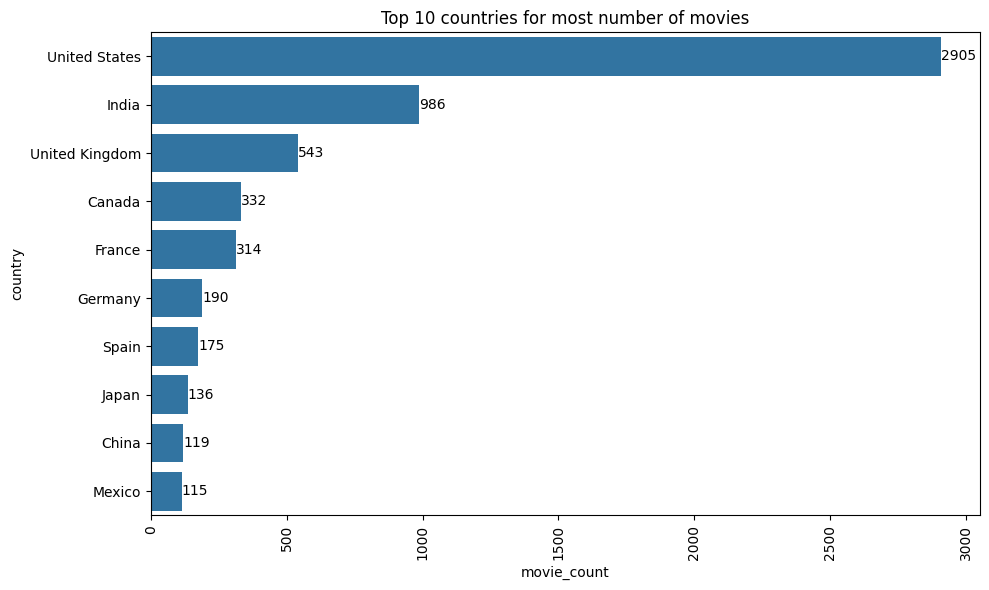

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=country_movie_ten,x='movie_count', y='country',linewidth=0)
plt.xticks(rotation=90,fontsize=10)
plt.title('Top 10 countries for most number of movies')
for i in ax.containers:
    ax.bar_label(i,)

plt.tight_layout()
plt.show()

Netflix started expanding into new markets and started investing in local content. Referenrce:https://gtelocalize.com/netflix-localization/#:~:text=By%20offering%20region%2Dspecific%20movies,and%20satisfaction%20across%20various%20markets.&text=Netflix%20localizes%20its%20user%20interface,search%20functions%20into%20local%20languages.

In [ ]:
country_tv_10 = country_tv.groupby(['country'])[['title']].nunique().rename(columns={'title':'tvshow_count'})
country_tv_10
country_tv_10 = country_tv_10.reset_index()


country_tv_10.sort_values(by='tvshow_count', ascending=False, inplace=True) # Changed 'title' to 'movie_count

country_tv_ten = country_tv_10.head(11).drop(country_tv_10.index[3]) # Use the index to drop the 8th row
country_tv_ten


,country,tvshow_count
64,United States,1028
63,United Kingdom,280
30,Japan,211
52,South Korea,193
8,Canada,134
19,France,97
25,India,92
57,Taiwan,74
53,Spain,72
2,Australia,69


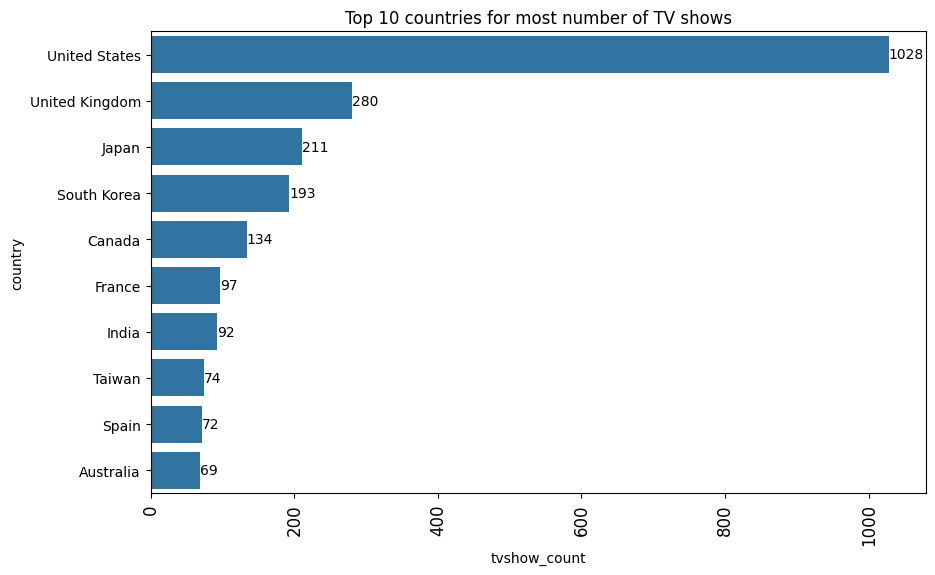

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=country_tv_ten,x='tvshow_count', y='country',linewidth=0)
plt.xticks(rotation=90,fontsize=12)
plt.title('Top 10 countries for most number of TV shows')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

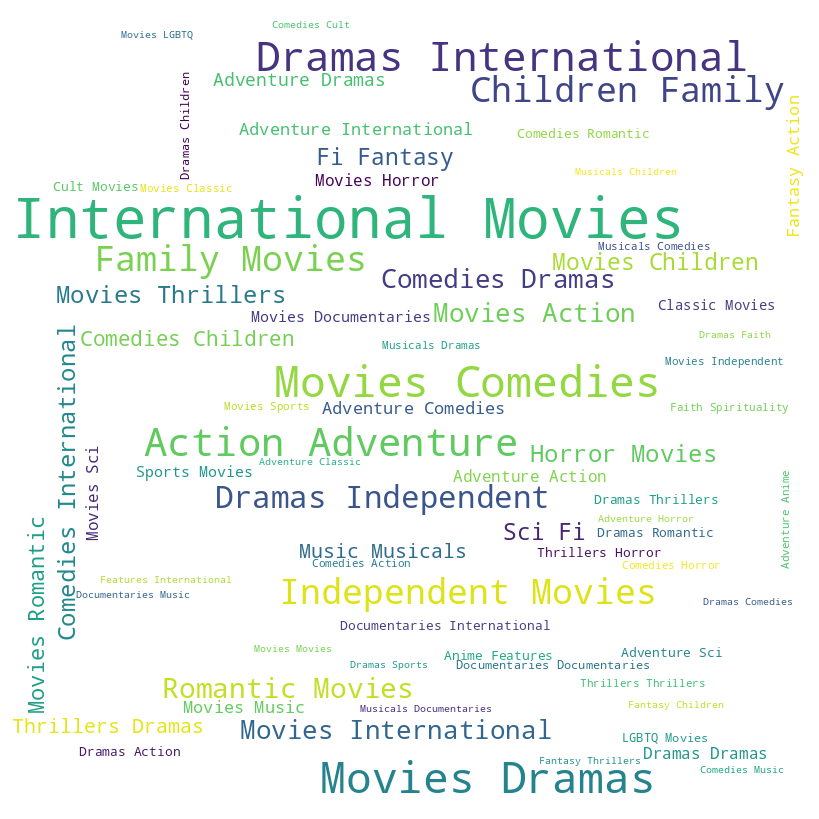

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
genre_movie = df2[movie_mask]

text = ' '.join(genre_movie['genre'].astype(str).tolist())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Netflix uses high quality dubbing in multiple languages, it has culturally adapted subtitles and it it's glocal marketing strategy makes International movies the most popular genre of netflix. refernece: https://gtelocalize.com/netflix-localization/

When movies are added to netflix after release

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson",United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday,3,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday,3,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,Friday,3,9
4,s5,TV Show,Kota Factory,"Saurabh Khanna, Arunabh Kumar, Raghav Subbu","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday,3,9


In [ ]:
df1['time_lag'] = df1['year'] - df1['release_year']

In [ ]:
df1['time_lag'].value_counts()

,count
time_lag,
0,3242
1,1587
2,716
3,492
4,367
...,...
76,1
63,1
-2,1


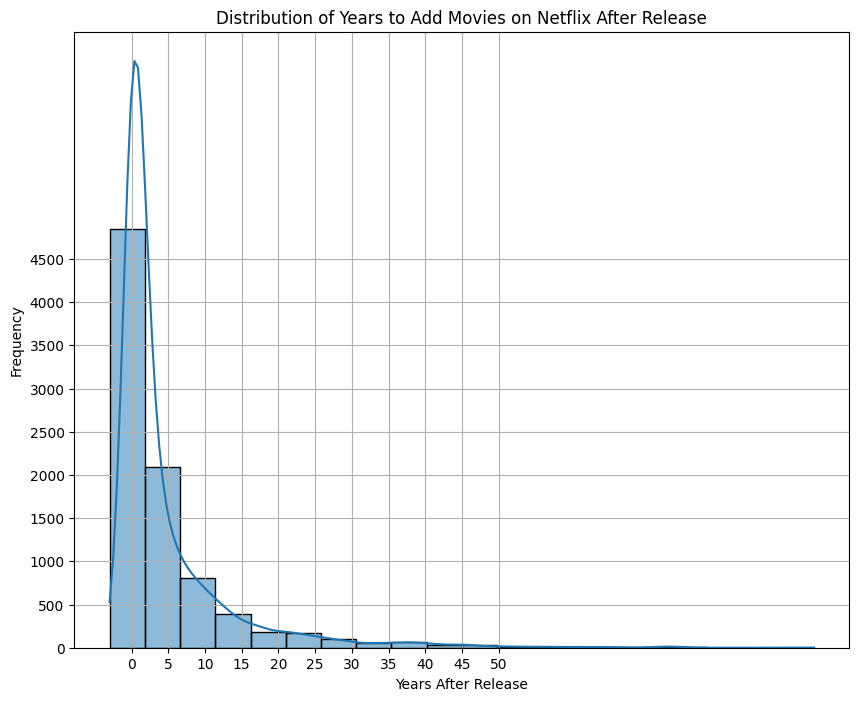

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df1['time_lag'],bins=20, kde=True)
plt.title('Distribution of Years to Add Movies on Netflix After Release')
plt.xlabel('Years After Release')
plt.ylabel('Frequency')
plt.yticks(ticks=range(0,5000,500))
plt.xticks(ticks=range(0, 51, 5))



plt.grid(True)


Most of the titles were added within a year.

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no,time_lag
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson",United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday,3,9,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday,3,9,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday,3,9,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,Friday,3,9,0
4,s5,TV Show,Kota Factory,"Saurabh Khanna, Arunabh Kumar, Raghav Subbu","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday,3,9,0


In [ ]:
mask1 = df['year'] > 2013
mask2 = df['year'] < 2022
df1_q = df1[mask1 & mask2]

df_quartly_title = df1_q.groupby(['year','quarter'])[['title']].count().rename(columns={'title':'title_count'})
df_quartly_title.reset_index(inplace=True)
df_quartly_title

,year,quarter,title_count
0,2014,1,4
1,2014,2,3
2,2014,3,4
3,2014,4,14
4,2015,1,12
5,2015,2,19
6,2015,3,16
7,2015,4,39
8,2016,1,77
9,2016,2,53


In [ ]:
df_q_pivot = df_quartly_title.pivot(index="quarter", columns="year", values="title_count")

In [ ]:
df_q_pivot

year,2014,2015,2016,2017,2018,2019,2020,2021
quarter,,,,,,,,
1,4.0,12.0,77.0,279.0,389.0,473.0,456.0,353.0
2,3.0,19.0,53.0,273.0,290.0,469.0,491.0,527.0
3,4.0,16.0,110.0,308.0,440.0,411.0,443.0,618.0
4,14.0,39.0,191.0,329.0,531.0,663.0,490.0,NaN


In [ ]:
#https://ir.netflix.net/financials/quarterly-earnings/default.aspx

df_sub = pd.read_csv('/content/drive/MyDrive/netflix_members_consolidated.csv')

In [ ]:
df_sub.head()

,year,Quarter,Paid members
0,2014,Q1,46.14
1,2014,Q2,47.99
2,2014,Q3,50.65
3,2014,Q4,54.48
4,2015,Q1,59.62


In [ ]:
df_sub.rename(columns={'Year':'year','Quarter':'quarter','Paid members' : 'subscribers(mn)'},inplace=True)

In [ ]:
pivot_table = df_sub.pivot(index="quarter", columns="year", values="subscribers(mn)")

In [ ]:
pivot_table

year,2014,2015,2016,2017,2018,2019,2020,2021
quarter,,,,,,,,
Q1,46.14,59.62,77.71,94.36,118.90,148.86,182.86,207.64
Q2,47.99,62.71,79.90,99.04,124.35,151.56,192.95,209.18
Q3,50.65,66.02,83.28,104.02,130.42,158.33,195.15,213.56
Q4,54.48,70.84,89.09,110.64,139.26,167.09,203.66,221.84


https://www.macrotrends.net/stocks/charts/NFLX/netflix/income-statement?freq=Q

In [ ]:

df_rev = pd.read_csv('/content/drive/MyDrive/netflix_revenue_macrotrends.csv')

In [ ]:
df_rev.head()

,year,quarter,revenue_million_usd
0,2014,Q1,1270
1,2014,Q2,1340
2,2014,Q3,1409
3,2014,Q4,1485
4,2015,Q1,1573


In [ ]:
df_rev.rename(columns={'Year':'year','Quarter':'quarter','revenue_million_usd' : 'revenue_mn'},inplace=True)



In [ ]:
df_rev.head()

,year,quarter,revenue_mn
0,2014,Q1,1270
1,2014,Q2,1340
2,2014,Q3,1409
3,2014,Q4,1485
4,2015,Q1,1573


How did titles, subscribers, and revenue change across years and quarters?

In [ ]:
df_rev_pivot = df_rev.pivot(index="quarter", columns="year", values="revenue_mn")

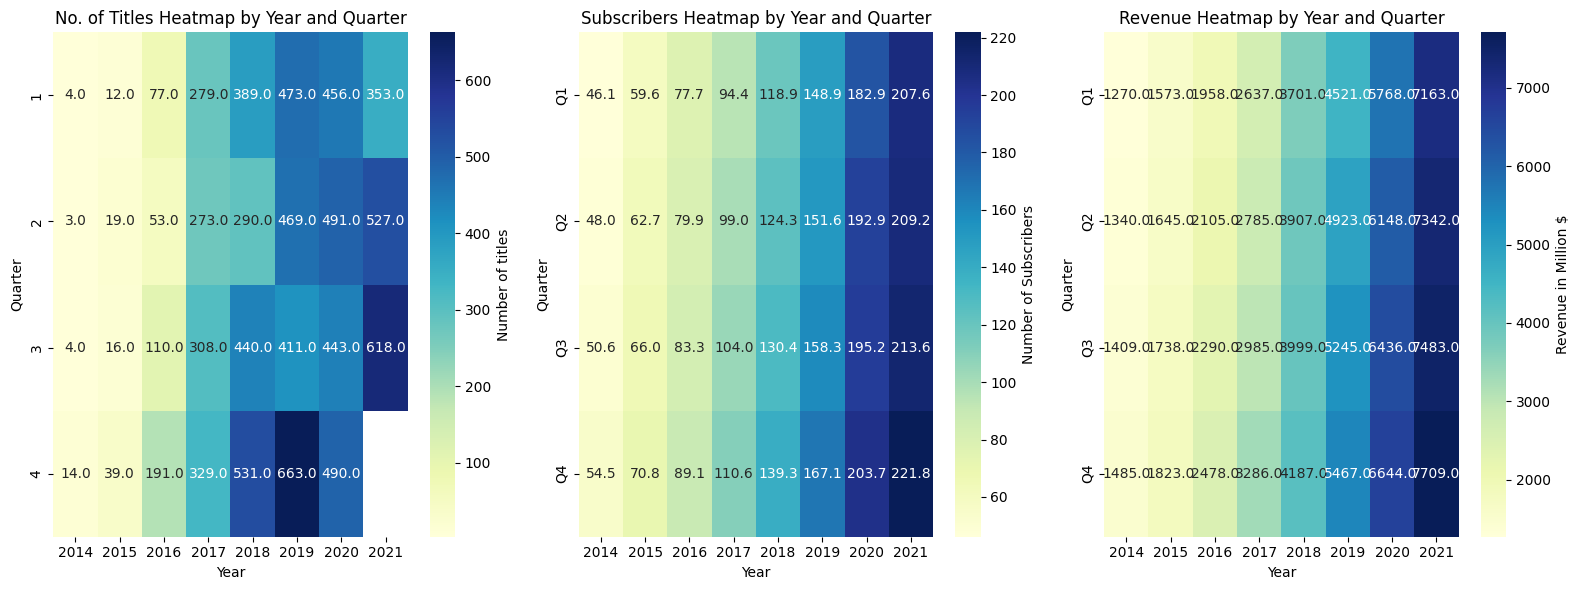

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.heatmap(df_q_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Number of titles'}) # Changed 'd' to '.1f' to format floats
plt.title('No. of Titles Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')


plt.subplot(1, 3, 2)

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Number of Subscribers'}) # Changed 'd' to '.1f' to format floats
plt.title('Subscribers Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 3)
sns.heatmap(df_rev_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Revenue in Million $'}) # Changed 'd' to '.1f' to format floats
plt.title('Revenue Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')
plt.tight_layout()
plt.show()




Number of Titles (left heatmap)

Netflix’s no.of titles increased a lot after 2016, and being highest  during years 2018 and 2019.

Some decrease in no. of title after 2019 (especially in Q1 2021 vs. Q1 2019) — may due to licensing removals or strategic cuts.

Subscribers (middle heatmap)

There is a continous increase in no. of subscribers every quarter, year-on-year.

Growth accelerates around 2017–2019, aligning with Netflix’s aggressive global expansion.

By 2020–2021, subscriber numbers are quite higher, may be because of lock-down during pandemic. As people didn't have option to go to cinema.

Revenue (right heatmap)

Revenue climbs steadily across all quarters, with strong increase after 2017.

The revenue increased in 2018–2020 matches the subscriber growth.



Netflix expanded content (titles) significantly between 2016–2019.

This expansion correlated with subscriber growth, which resulted in revenue growth.

After the year 2019, titles growth slowed, but revenue and subscribers kept rising, suggesting Netflix shifted strategy from just expanding library size to improving pricing power,  content, and may be marketing strategy.

In [ ]:
from scipy.stats import pearsonr
df_sub['quarter'] = df_sub['quarter'].astype(str)
df_sub['year'] = df_sub['year'].astype(str)
df_rev['quarter'] = df_rev['quarter'].astype(str)
df_rev['year'] = df_rev['year'].astype(str)
df_quartly_title['quarter'] = df_quartly_title['quarter'].astype(str)
df_quartly_title['year'] = df_quartly_title['year'].astype(str)
df_quartly_title['title_count'] = df_quartly_title['title_count'].astype(int)
df_sub['subscribers(mn)'] = df_sub['subscribers(mn)'].astype(int)
df_rev['revenue_mn'] = df_rev['revenue_mn'].astype(int)




In [ ]:
print("Titles:", df_quartly_title.shape)
print("Subs:", df_sub.shape)
print("Rev:", df_rev.shape)

# Check unique values of keys
print("Titles years:", df_quartly_title['year'].unique())
print("Subs years:", df_sub['year'].unique())
print("Rev years:", df_rev['year'].unique())

print("Titles quarters:", df_quartly_title['quarter'].unique())
print("Subs quarters:", df_sub['quarter'].unique())
print("Rev quarters:", df_rev['quarter'].unique())

Titles: (31, 5)
Subs: (32, 5)
Rev: (32, 5)
Titles years: ['2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021']
Subs years: ['2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021']
Rev years: ['2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021']
Titles quarters: ['1' '2' '3' '4']
Subs quarters: ['Q1' 'Q2' 'Q3' 'Q4']
Rev quarters: ['Q1' 'Q2' 'Q3' 'Q4']


Pearson correlation (r): 0.9960642174870453
P-value: 4.4573926966235004e-32


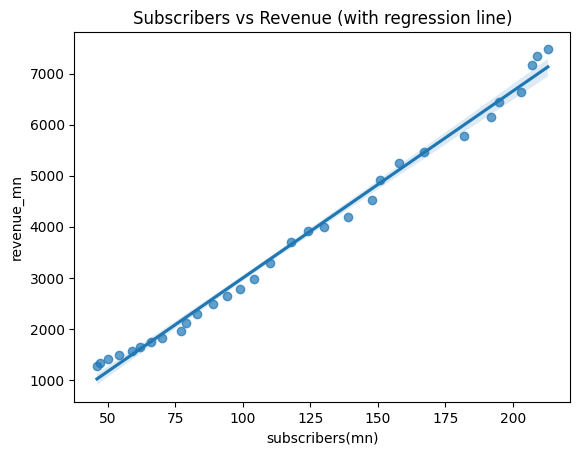

In [ ]:
df_sub['quarter'] = df_sub['quarter'].str.replace('Q','')
df_rev['quarter'] = df_rev['quarter'].str.replace('Q','')

# --- Merge ---
df_tsr = pd.merge(df_quartly_title, df_sub, on=['year','quarter'])
df_tsr = pd.merge(df_tsr, df_rev, on=['year','quarter'])

r, p = pearsonr(df_tsr['subscribers(mn)'], df_tsr['revenue_mn'])
print("Pearson correlation (r):", r)
print("P-value:", p)
# --- Scatterplot ---

sns.regplot(data=df_tsr, x='subscribers(mn)', y='revenue_mn', scatter_kws={'alpha':0.7})
plt.title('Subscribers vs Revenue (with regression line)')
plt.show()

There is a very strong and statistically significant correlation (r ≈ 0.99, p < 0.001) between Netflix subscribers and revenue. This confirms that subscriber growth is the primary driver of revenue growth.

Revenue growth is directly tied to subscriber growth.

The relationship looks linear because Netflix’s main income is subscriptions, so more subscribers = more revenue.

Small deviations (some dots slightly above/below the line) are likely due to:

Price changes (Netflix raised subscription fees a few times)

Regional mix shifts (different Average revenue per user in the US vs other regions)

Promotions or discounts

Pearson correlation (r): 0.8836091560820676
P-value: 4.5716478020970903e-11


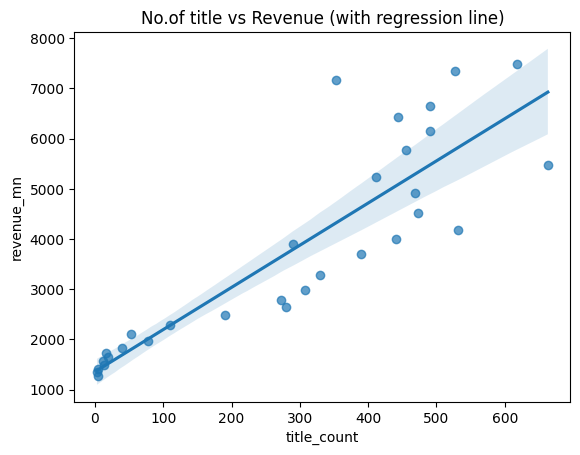

In [ ]:
r, p = pearsonr(df_tsr['title_count'], df_tsr['revenue_mn'])
print("Pearson correlation (r):", r)
print("P-value:", p)

sns.regplot(data=df_tsr, x='title_count', y='revenue_mn', scatter_kws={'alpha':0.7})
plt.title('No.of title vs Revenue (with regression line)')
plt.show()

This suggests that titles are correlated with revenue, but not as strongly as subscribers are.

Revenue isn’t driven just by the sheer number of titles — quality, regional mix, and marketing strategy also matter.

Some points with high title counts (500–600) show less revenue than expected given the regression line.

This may reflect:

Content saturation (adding more titles doesn’t always add more subscribers).

Content quality/licensing (not all titles attract equal engagement).

External factors (competition, pricing, global expansion).

Expanding the library helped Netflix in its early growth years (2014–2017), but after a point, subscriber growth (and pricing power = ARPU) became a more reliable driver of revenue than just adding titles.

This aligns with Netflix’s shift in strategy around 2018–2019 → fewer but higher-quality originals instead of simply maximizing the number of available titles.

Pearson correlation (r): 0.8990984393640901
P-value: 6.388288102404366e-12


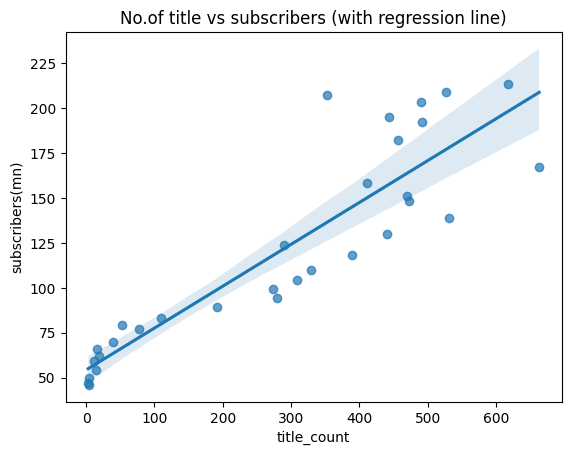

In [ ]:
r, p = pearsonr(df_tsr['title_count'], df_tsr['subscribers(mn)'])
print("Pearson correlation (r):", r)
print("P-value:", p)

sns.regplot(data=df_tsr, x='title_count', y='subscribers(mn)', scatter_kws={'alpha':0.7})
plt.title('No.of title vs subscribers (with regression line)')
plt.show()

Expanding the library helped Netflix in its early growth years (2014–2017), but after a point, subscriber growth (and pricing power = ARPU) became a more reliable driver of revenue than just adding titles.

This aligns with Netflix’s shift in strategy around 2018–2019 → fewer but higher-quality originals instead of simply maximizing the number of available titles.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def compute_r2(x, y):
    model = LinearRegression()
    X = np.array(x).reshape(-1, 1)
    Y = np.array(y)
    model.fit(X, Y)
    return model.score(X, Y)  # this is R²

# Subscribers → Revenue
r2_sub_rev = compute_r2(df_tsr['subscribers(mn)'], df_tsr['revenue_mn'])

# Titles → Revenue
r2_title_rev = compute_r2(df_tsr['title_count'], df_tsr['revenue_mn'])

# Titles → Subscribers
r2_title_sub = compute_r2(df_tsr['title_count'], df_tsr['subscribers(mn)'])

print(f"Subscribers vs Revenue R²: {r2_sub_rev:.2%}")
print(f"Titles vs Revenue R²: {r2_title_rev:.2%}")
print(f"Titles vs Subscribers R²: {r2_title_sub:.2%}")

Subscribers vs Revenue R²: 99.21%
Titles vs Revenue R²: 78.08%
Titles vs Subscribers R²: 80.84%


Subscribers vs Revenue (R² = 99.21%)
→ Almost perfect explanatory power. Subscriber growth accounts for nearly all revenue growth.

Titles vs Subscribers (R² = 80.84%)
→ Strong relationship. Catalog expansion played a big role in attracting new subscribers, though not perfectly.

Titles vs Revenue (R² = 78.08%)
→ Moderate-strong relationship. Content expansion supported revenue growth, but not as directly as subscriber growth did.

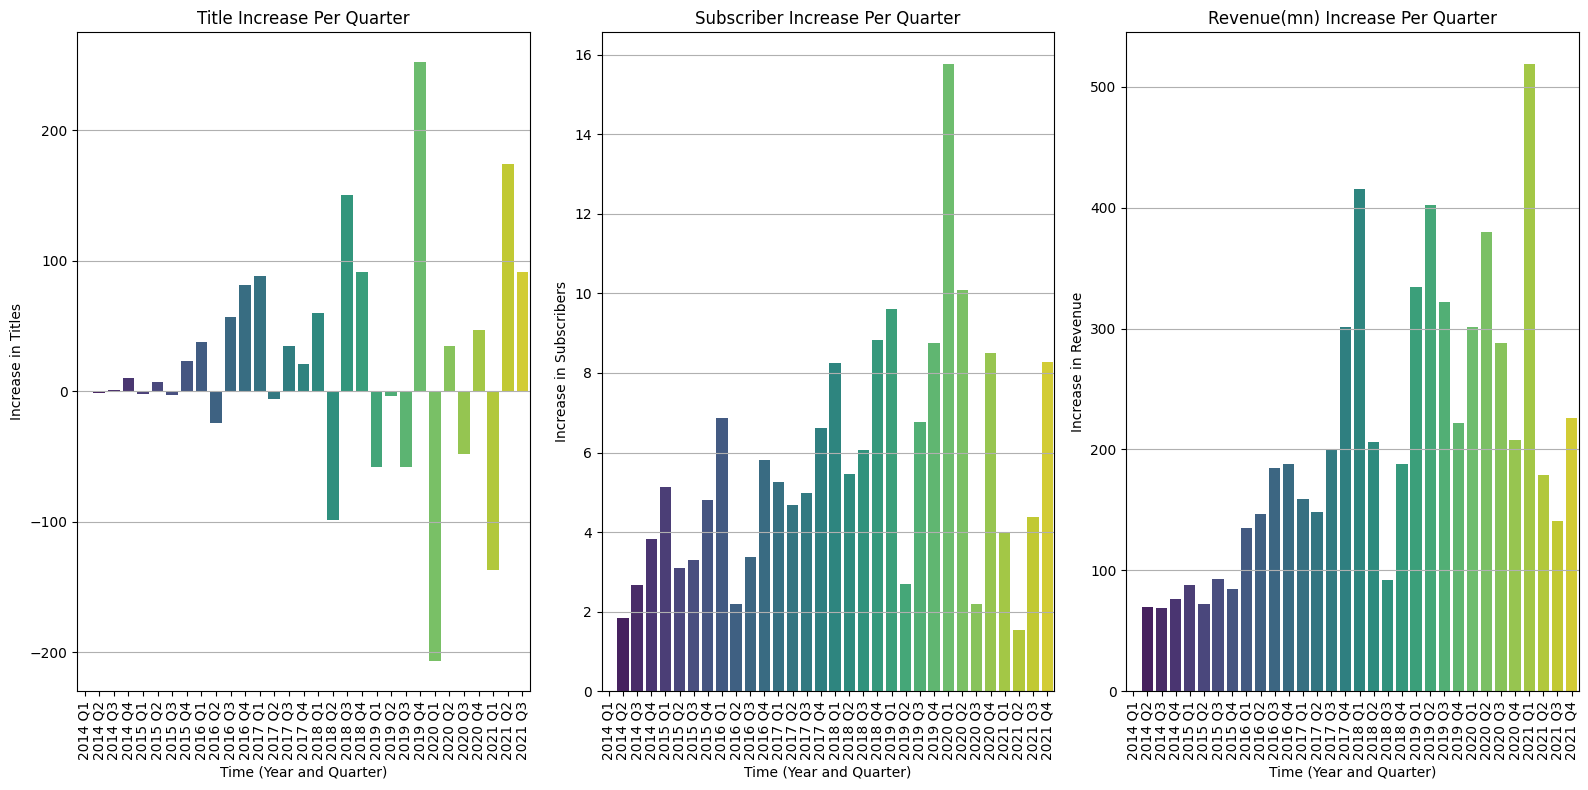

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)

# The 'Time' column is created within the first subplot for df_quartly_title
df_quartly_title['Time'] = df_quartly_title['year'].astype(str) + ' ' +'Q'+df_quartly_title['quarter'].astype(str)
df_quartly_title['titles increased'] = df_quartly_title['title_count'].diff().fillna(0)

bar_plot = sns.barplot(data=df_quartly_title, x='Time', y='titles increased', palette='viridis') # Changed DataFrame to df_quartly_title and y axis to 'titles increased'
plt.title('Title Increase Per Quarter')
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Increase in Titles')

plt.xticks(rotation=90)
plt.grid(axis='y')

plt.subplot(1,3,2)

# Create the 'Time' column for df_sub_rel before using it in the plot
df_sub['Time'] = df_sub['year'].astype(str) + ' ' + df_sub['quarter'].astype(str)
df_sub['Subscriber Increase'] = df_sub['subscribers(mn)'].diff().fillna(0)
bar_plot = sns.barplot(data=df_sub, x='Time', y='Subscriber Increase', palette='viridis')
plt.title('Subscriber Increase Per Quarter')
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Increase in Subscribers')

plt.xticks(rotation=90)
plt.grid(axis='y')

plt.subplot(1, 3, 3)

df_rev['Time'] = df_rev['year'].astype(str) + ' ' + df_rev['quarter'].astype(str)
df_rev['Revenue Increase'] = df_rev['revenue_mn'].diff().fillna(0)
bar_plot = sns.barplot(data=df_rev, x='Time', y='Revenue Increase', palette='viridis')
plt.title('Revenue(mn) Increase Per Quarter')
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Increase in Revenue')

plt.xticks(rotation=90)
plt.grid(axis='y')


plt.tight_layout()
plt.show()

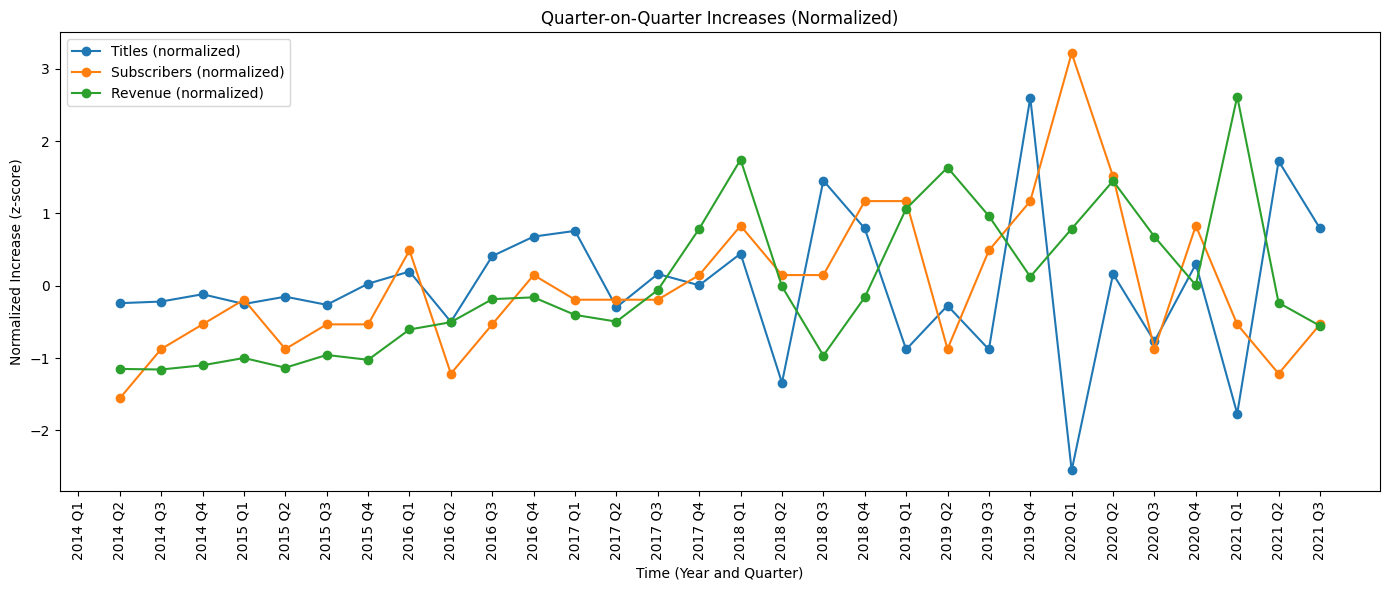

In [ ]:
import matplotlib.pyplot as plt

# Copy to avoid changing original
df_overlay = df_tsr.copy()

# Compute quarter-on-quarter increases
df_overlay['titles increased'] = df_overlay['title_count'].diff()
df_overlay['Subscriber Increase'] = df_overlay['subscribers(mn)'].diff()
df_overlay['Revenue Increase'] = df_overlay['revenue_mn'].diff()

# Normalize each series (z-score: mean=0, std=1)
for col in ['titles increased','Subscriber Increase','Revenue Increase']:
    df_overlay[col + '_norm'] = (df_overlay[col] - df_overlay[col].mean()) / df_overlay[col].std()

# Create time label
df_overlay['time'] = df_overlay['year'] + " Q" + df_overlay['quarter']

# Plot
plt.figure(figsize=(14,6))
plt.plot(df_overlay['time'], df_overlay['titles increased_norm'], label='Titles (normalized)', marker='o')
plt.plot(df_overlay['time'], df_overlay['Subscriber Increase_norm'], label='Subscribers (normalized)', marker='o')
plt.plot(df_overlay['time'], df_overlay['Revenue Increase_norm'], label='Revenue (normalized)', marker='o')

plt.xticks(rotation=90)
plt.title("Quarter-on-Quarter Increases (Normalized)")
plt.xlabel("Time (Year and Quarter)")
plt.ylabel("Normalized Increase (z-score)")
plt.legend()
plt.tight_layout()
plt.show()


Here no. of titles added in 2020 Q1 are not significant, still no. of subscrinbers increased are highest for this period but the revenue is the lowest,so chances may be there that users might have left after initial offer or a trial period.The other factor could be the beginnig of lockdown and people being confined to their home due to corona pandemic and they didn't have a choice to access other entertainment mediums.
Reference:Han J, Kim W, Jeong E (2019) Factors affecting the intention to pay for online content among Millennials. Telematics Inform 37:135–145
https://link.springer.com/chapter/10.1007/978-981-99-7058-2_18


In [ ]:
# imdb csv merged with netflix to get rating
df_rating = pd.read_csv('/content/drive/MyDrive/imdb_netflix_titles_with_ratings.csv')

In [ ]:
df_rating.head()

,tconst,primaryTitle,startYear,titleType,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,movie,5.4,214
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,movie,5.2,531
2,tt0000502,Bohemios,1905,movie,4.4,18
3,tt0000574,The Story of the Kelly Gang,1906,movie,6.0,929
4,tt0000591,The Prodigal Son,1907,movie,5.7,28


In [ ]:
df_rating.drop(columns='tconst', inplace=True)

In [ ]:
df_rating.head()

,primaryTitle,startYear,titleType,averageRating,numVotes
0,Miss Jerry,1894,movie,5.4,214
1,The Corbett-Fitzsimmons Fight,1897,movie,5.2,531
2,Bohemios,1905,movie,4.4,18
3,The Story of the Kelly Gang,1906,movie,6.0,929
4,The Prodigal Son,1907,movie,5.7,28


In [ ]:
df_rating.rename(columns={'primaryTitle':'title', 'startYear':'year', 'titleType':'type','averageRating':'avg_rating','numVotes':'votes'}, inplace=True)

In [ ]:
df_rating.head()

,title,year,type,avg_rating,votes
0,Miss Jerry,1894,movie,5.4,214
1,The Corbett-Fitzsimmons Fight,1897,movie,5.2,531
2,Bohemios,1905,movie,4.4,18
3,The Story of the Kelly Gang,1906,movie,6.0,929
4,The Prodigal Son,1907,movie,5.7,28


In [ ]:
df_newr = df_rating[['title','type','avg_rating','votes']]

In [ ]:
df_newr

,title,type,avg_rating,votes
0,Miss Jerry,movie,5.4,214
1,The Corbett-Fitzsimmons Fight,movie,5.2,531
2,Bohemios,movie,4.4,18
3,The Story of the Kelly Gang,movie,6.0,929
4,The Prodigal Son,movie,5.7,28
...,...,...,...,...
164732,Tranced,movie,5.6,57
164733,A Matter of Degree,tvSeries,8.1,20
164734,La louve,tvSeries,7.0,10
164735,Unemployed,movie,3.0,163


In [ ]:
df_rating_net = pd.merge(df_newr, df, on='title', how='inner')

In [ ]:
df_rating_net.head()

,title,type_x,avg_rating,votes,show_id,type_y,director,cast,country,date_added,release_year,rating,duration,genre,year,month,day,quarter,month_no
0,The Golem,movie,6.7,1261,s8323,Movie,"Doron Paz, Yoav Paz","Hani Furstenberg, Ishai Golan, Kirill Cernyako...",Israel,2019-06-26,2018,TV-MA,95 min,"Horror Movies, Independent Movies, Internation...",2019,June,Wednesday,2,6
1,The House Next Door,movie,3.0,18,s5089,Movie,Milind Rau,"Siddharth, Andrea Jeremiah, Anisha Victor, Atu...",India,2018-01-09,2017,TV-MA,135 min,"Horror Movies, International Movies, Thrillers",2018,January,Tuesday,1,1
2,Samson,movie,6.1,31,s7929,Movie,"Bruce MacDonald, Gabriel Sabloff","Taylor James, Billy Zane, Lindsay Wagner, Cait...","South Africa, United States",2018-12-14,2018,PG-13,109 min,"Action & Adventure, Dramas, Faith & Spirituality",2018,December,Friday,4,12
3,The Spy,movie,7.4,16,s3535,TV Show,NaN,"Sacha Baron Cohen, Noah Emmerich, Hadar Ratzon...",France,2019-09-06,2019,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",2019,September,Friday,3,9
4,The Captive,movie,6.4,170,s8237,Movie,Atom Egoyan,"Ryan Reynolds, Scott Speedman, Rosario Dawson,...",Canada,2018-07-20,2014,R,112 min,"Dramas, Thrillers",2018,July,Friday,3,7


In [ ]:
df_rating_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         3260 non-null   object        
 1   type_x        3260 non-null   object        
 2   avg_rating    3260 non-null   float64       
 3   votes         3260 non-null   int64         
 4   show_id       3260 non-null   object        
 5   type_y        3260 non-null   object        
 6   director      2385 non-null   object        
 7   cast          3127 non-null   object        
 8   country       3081 non-null   object        
 9   date_added    3260 non-null   datetime64[ns]
 10  release_year  3260 non-null   int64         
 11  rating        3260 non-null   object        
 12  duration      3260 non-null   object        
 13  genre         3260 non-null   object        
 14  year          3260 non-null   int32         
 15  month         3260 non-null   object  

In [ ]:
impact_cols = ['title','type_x','avg_rating','votes','year','quarter']
df_last = df_rating_net[impact_cols]

In [ ]:
df_last['title'].duplicated()

,title
0,False
1,False
2,False
3,False
4,False
...,...
3255,False
3256,True
3257,True
3258,True


In [ ]:
df_l = df_last.drop_duplicates(subset=['title'], keep='first')

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803 entries, 0 to 3255
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       1803 non-null   object 
 1   type_x      1803 non-null   object 
 2   avg_rating  1803 non-null   float64
 3   votes       1803 non-null   int64  
 4   year        1803 non-null   int32  
 5   quarter     1803 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 84.5+ KB


In [ ]:
df_l.head()


,title,type_x,avg_rating,votes,year,quarter
0,The Golem,movie,6.7,1261,2019,2
1,The House Next Door,movie,3.0,18,2018,1
2,Samson,movie,6.1,31,2018,4
3,The Spy,movie,7.4,16,2019,3
4,The Captive,movie,6.4,170,2018,3


In [ ]:
df_l['year'] = df_l['year'].fillna(0).astype(int)
df_l['quarter'] = df_l['quarter'].fillna(0).astype(int)

In [ ]:
df_l_movie = df_l[df_l['type_x'] == 'movie']
df_l_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 3255
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       1597 non-null   object 
 1   type_x      1597 non-null   object 
 2   avg_rating  1597 non-null   float64
 3   votes       1597 non-null   int64  
 4   year        1597 non-null   int64  
 5   quarter     1597 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 87.3+ KB


In [ ]:

df_l['high_rate'] = (df_l['avg_rating'] >= 7).astype(int)
df_l['low_rate'] = (df_l['avg_rating'] < 7).astype(int)
df_l.head()

,title,type_x,avg_rating,votes,year,quarter,high_rate,low_rate
0,The Golem,movie,6.7,1261,2019,2,0,1
1,The House Next Door,movie,3.0,18,2018,1,0,1
2,Samson,movie,6.1,31,2018,4,0,1
3,The Spy,movie,7.4,16,2019,3,1,0
4,The Captive,movie,6.4,170,2018,3,0,1


In [ ]:
df_rat = df_l.groupby(['year','quarter'])[['high_rate','low_rate']].sum()

In [ ]:
df_rat.reset_index(inplace=True)
df_rat.head()

,year,quarter,high_rate,low_rate
0,2008,1,1,0
1,2013,3,1,0
2,2013,4,1,0
3,2014,1,0,1
4,2014,2,0,1


In [ ]:
my1 = df_rat['year'] > 2014
my2 = df_rat['year'] < 2022
df_rat_rel = df_rat[my1 & my2]

In [ ]:
df_rat_rel.head()

,year,quarter,high_rate,low_rate
6,2015,1,2,1
7,2015,2,1,1
8,2015,3,2,3
9,2015,4,2,2
10,2016,1,4,13


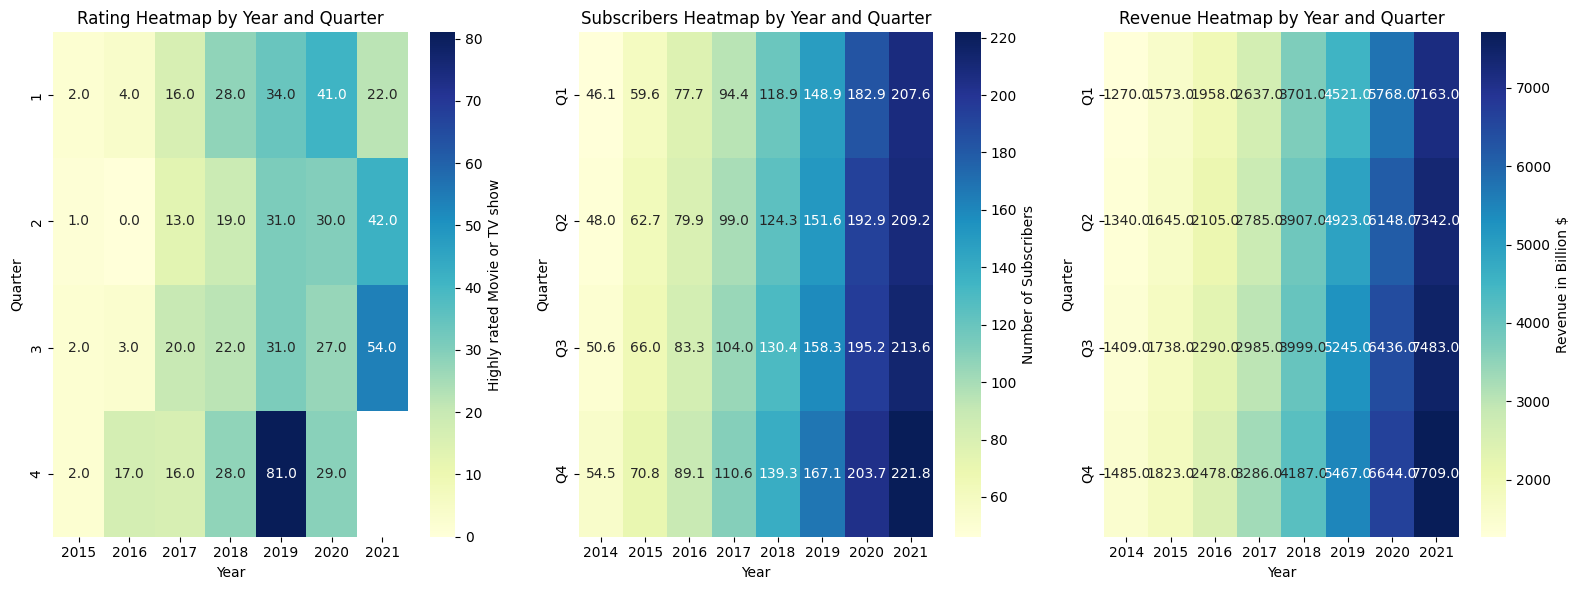

In [ ]:
df_rat_pivot = df_rat_rel.pivot(index="quarter", columns="year", values="high_rate")
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.heatmap(df_rat_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Highly rated Movie or TV show'}) # Changed 'd' to '.1f' to format floats
plt.title('Rating Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 2)

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Number of Subscribers'}) # Changed 'd' to '.1f' to format floats
plt.title('Subscribers Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 3)
sns.heatmap(df_rev_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Revenue in Billion $'}) # Changed 'd' to '.1f' to format floats
plt.title('Revenue Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')


plt.tight_layout()
plt.show()

Here more titles with rating 7 or higher are added during 4th quarter of 2019, and due to it there may be more no. of subscribers joined or revenue increased for the same quarter.Similar pattern is observed for Q3 of year 2021, but it may not be the only factor and other factors need to be considered like netflix original titles or recovery from pandemic.

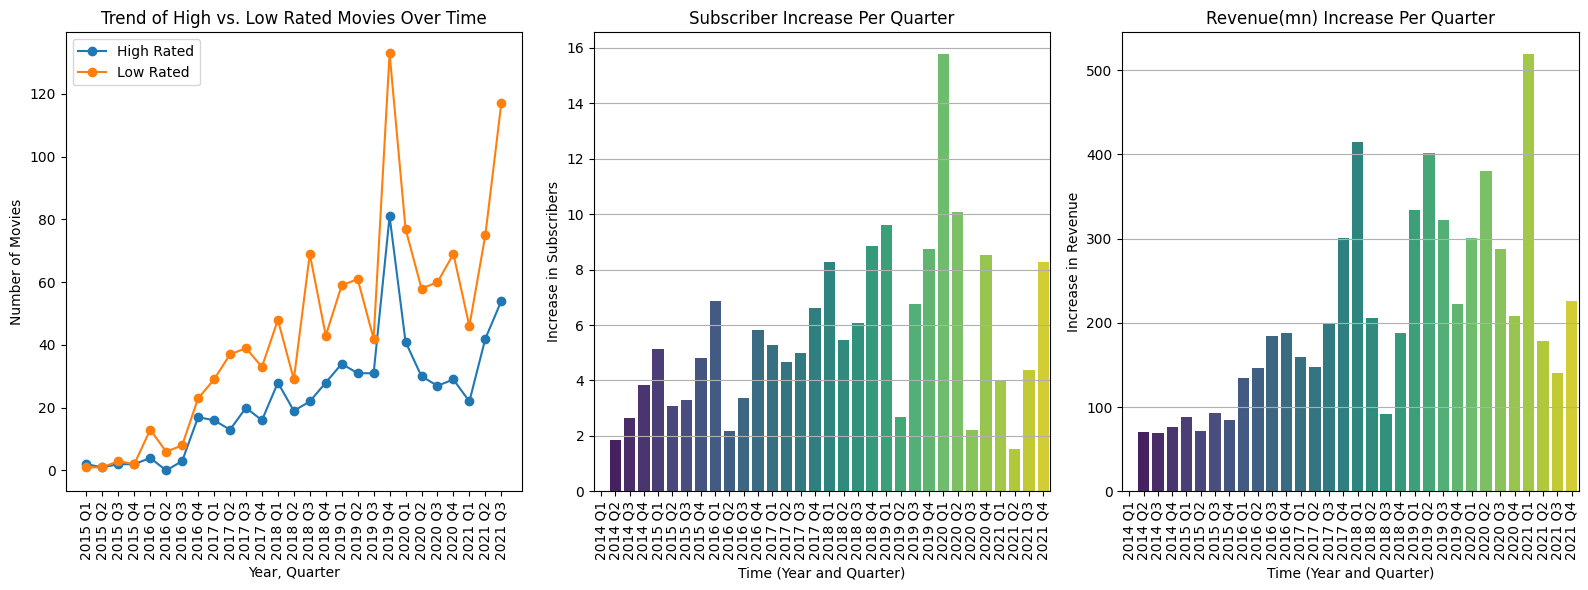

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.plot(df_rat_rel['year'].astype(str) + " " +'Q'+df_rat_rel['quarter'].astype(str), df_rat_rel['high_rate'], label='High Rated', marker='o') # Changed df_rat_rel['quarter'] to df_rat_rel['quarter'].astype(str)
plt.plot(df_rat_rel['year'].astype(str) + " " +'Q'+df_rat_rel['quarter'].astype(str), df_rat_rel['low_rate'], label='Low Rated', marker='o') # Changed df_rat_rel['quarter'] to df_rat_rel['quarter'].astype(str)

plt.title('Trend of High vs. Low Rated Movies Over Time')
plt.xlabel('Year, Quarter')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(1,3,2)

df_sub['Time'] = df_sub['year'].astype(str) + ' ' + df_sub['quarter'].astype(str)
df_sub['Subscriber Increase'] = df_sub['subscribers(mn)'].diff().fillna(0)
bar_plot = sns.barplot(data=df_sub, x='Time', y='Subscriber Increase', palette='viridis')
plt.title('Subscriber Increase Per Quarter')
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Increase in Subscribers')

plt.xticks(rotation=90)
plt.grid(axis='y')

plt.subplot(1, 3, 3)

df_rev['Time'] = df_rev['year'].astype(str) + ' ' + df_rev['quarter'].astype(str)
df_rev['Revenue Increase'] = df_rev['revenue_mn'].diff().fillna(0)
bar_plot = sns.barplot(data=df_rev, x='Time', y='Revenue Increase', palette='viridis')
plt.title('Revenue(mn) Increase Per Quarter')
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Increase in Revenue')



plt.xticks(rotation=90)
plt.grid(axis='y')



plt.tight_layout()
plt.show()

Here adding highly rated title may have some impact and there may be factors associated for the delayed impact; It needs to be further analysized in terms of content type and duration, as well as macroeconomic factors.





In [ ]:
#scrapped from wikipedia
df_acad = pd.read_csv('/content/drive/MyDrive/academy_movie.csv')


In [ ]:
df_acad.head()

,Film,Year,Awards,Nominations
0,Oppenheimer,2023,7,13
1,Poor Things,2023,4,11
2,The Zone of Interest,2023,2,5
3,American Fiction,2023,1,5
4,Anatomy of a Fall,2023,1,5


In [ ]:
df_acad.rename(columns={'Film':'title','Year':'year'}, inplace=True)

In [ ]:
df_acad['year'].unique()

array(['2023', '2022', '2021', '2020/21', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984',
       '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976',
       '1975', '1974', '1973', '1972', '1971', '1970', '1969', '1968',
       '1967', '1966', '1965', '1964', '1927/28', '1954', '1949', '1938',
       '1951', '1943', '1960', '1953', '1957', '1950', '1929/30', '1941',
       '1958', '1963', '1956', '1945', '1946', '1936', '1940', '1937',
       '1947', '1952', '1931/32', '1942', '1959', '1948', '1962', '1961',
       '1928/29', '1955', '1935', '1939', '1932/33', '1930/31', '1934',
       '1944'], dtype=object)

In [ ]:
acad_net = pd.merge(df_acad, df, on='title', how='inner')
acad_net.head()

,title,year_x,Awards,Nominations,show_id,type,director,cast,country,date_added,release_year,rating,duration,genre,year_y,month,day,quarter,month_no
0,Ma Rainey's Black Bottom,2020/21,2,5,s1518,Movie,George C. Wolfe,"Viola Davis, Chadwick Boseman, Glynn Turman, C...",United States,2020-12-18,2020,R,94 min,"Dramas, Music & Musicals",2020,December,Friday,4,12
1,My Octopus Teacher,2020/21,1,1,s2039,Movie,"Pippa Ehrlich, James Reed",NaN,South Africa,2020-09-07,2020,TV-G,86 min,"Children & Family Movies, Documentaries, Inter...",2020,September,Monday,3,9
2,If Anything Happens I Love You,2020/21,1,1,s1670,Movie,"Will McCormack, Michael Govier",NaN,United States,2020-11-20,2020,PG,13 min,Dramas,2020,November,Friday,4,11
3,Two Distant Strangers,2020/21,1,1,s1090,Movie,"Travon Free, Martin Desmond Roe","Joey Bada$$, Andrew Howard, Zaria",United States,2021-04-09,2021,TV-MA,32 min,Dramas,2021,April,Friday,2,4
4,Marriage Story,2019,1,6,s3170,Movie,Noah Baumbach,"Scarlett Johansson, Adam Driver, Laura Dern, A...","United Kingdom, United States",2019-12-06,2019,R,137 min,Dramas,2019,December,Friday,4,12


In [ ]:
acad_net['Awards'].unique()

array(['2', '1', '3', '5', '4', '11', '7', '0 (1)', '9', '8', '1 (1)'],
      dtype=object)

In [ ]:
a_m = acad_net['Awards'] != '1(1)'
a_n = acad_net['Awards'] != '0(1)'
acad_net = acad_net[a_m & a_n]


In [ ]:

acad_net[['year_y','quarter']]=acad_net[['year_y','quarter']].astype(int)

In [ ]:
acad_net.head()

,title,year_x,Awards,Nominations,show_id,type,director,cast,country,date_added,release_year,rating,duration,genre,year_y,month,day,quarter,month_no
0,Ma Rainey's Black Bottom,2020/21,2,5,s1518,Movie,George C. Wolfe,"Viola Davis, Chadwick Boseman, Glynn Turman, C...",United States,2020-12-18,2020,R,94 min,"Dramas, Music & Musicals",2020,December,Friday,4,12
1,My Octopus Teacher,2020/21,1,1,s2039,Movie,"Pippa Ehrlich, James Reed",NaN,South Africa,2020-09-07,2020,TV-G,86 min,"Children & Family Movies, Documentaries, Inter...",2020,September,Monday,3,9
2,If Anything Happens I Love You,2020/21,1,1,s1670,Movie,"Will McCormack, Michael Govier",NaN,United States,2020-11-20,2020,PG,13 min,Dramas,2020,November,Friday,4,11
3,Two Distant Strangers,2020/21,1,1,s1090,Movie,"Travon Free, Martin Desmond Roe","Joey Bada$$, Andrew Howard, Zaria",United States,2021-04-09,2021,TV-MA,32 min,Dramas,2021,April,Friday,2,4
4,Marriage Story,2019,1,6,s3170,Movie,Noah Baumbach,"Scarlett Johansson, Adam Driver, Laura Dern, A...","United Kingdom, United States",2019-12-06,2019,R,137 min,Dramas,2019,December,Friday,4,12


In [ ]:
acad_g = acad_net.groupby(['year_y','quarter'])[['title']].count().rename(columns={'title':'title_count'})
acad_g.reset_index(inplace=True)
acad_g.head()

,year_y,quarter,title_count
0,2015,1,1
1,2016,3,1
2,2016,4,2
3,2017,1,6
4,2017,2,1


In [ ]:
df_aca_pivot = acad_g.pivot(index="quarter",columns="year_y", values="title_count")


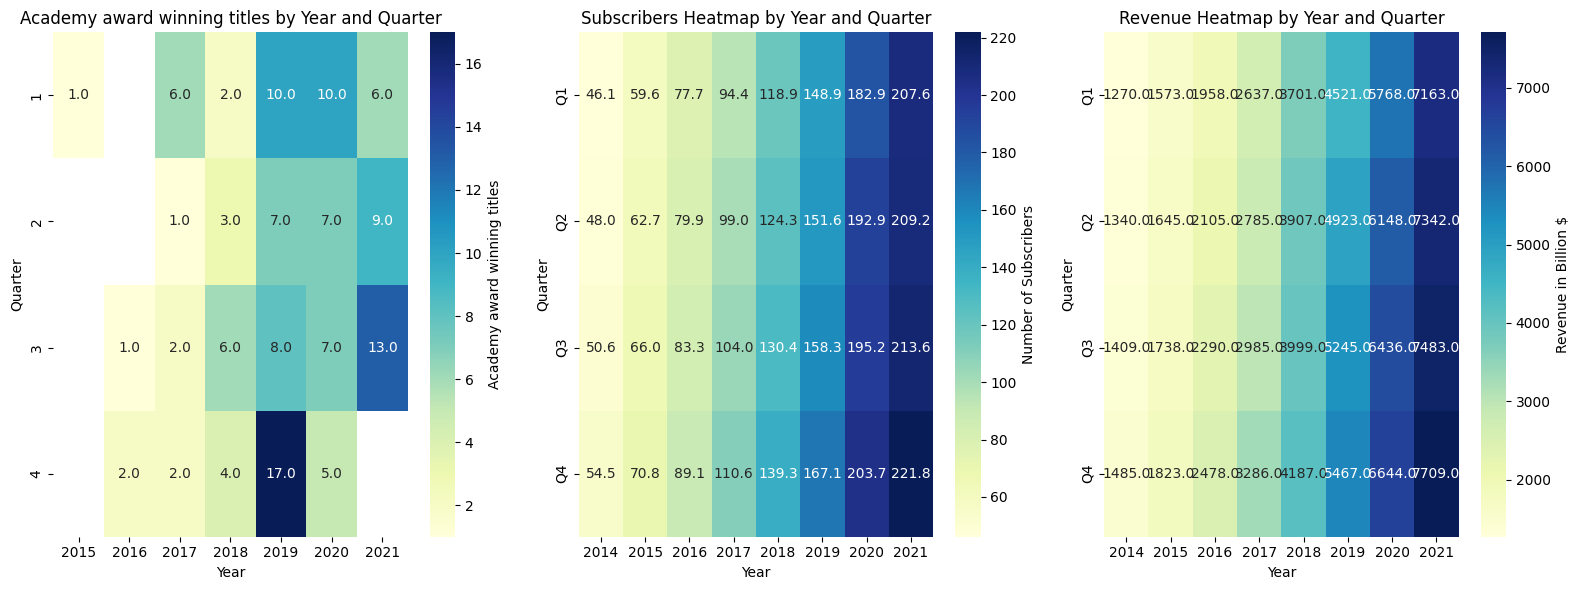

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
sns.heatmap(df_aca_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Academy award winning titles'}) # Changed 'd' to '.1f' to format floats
plt.title('Academy award winning titles by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 2)

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Number of Subscribers'}) # Changed 'd' to '.1f' to format floats
plt.title('Subscribers Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 3)
sns.heatmap(df_rev_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Revenue in Billion $'}) # Changed 'd' to '.1f' to format floats
plt.title('Revenue Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')


plt.tight_layout()
plt.show()

In [ ]:
acad_g.rename(columns={'year_y':'year'}, inplace=True)
acad_g['year']=acad_g['year'].astype(str)
acad_g['quarter']=acad_g['quarter'].astype(str)
df_aca = pd.merge(df_sub, acad_g, on=['year','quarter'])
df_aca = pd.merge(df_aca, df_rev, on=['year','quarter'])

Pearson correlation (r): 0.6820527243345934
P-value: 0.0004716871462778977


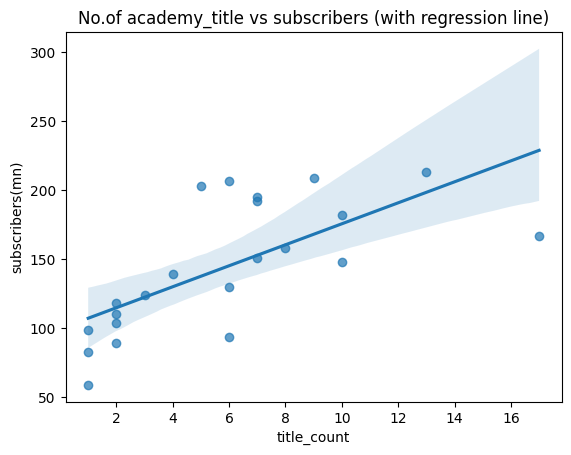

In [ ]:
r, p = pearsonr(df_aca["title_count"], df_aca["subscribers(mn)"])
print("Pearson correlation (r):", r)
print("P-value:", p)

sns.regplot(data=df_aca, x='title_count', y='subscribers(mn)', scatter_kws={'alpha':0.7})
plt.title('No.of academy_title vs subscribers (with regression line)')
plt.show()

Pearson correlation (r): 0.6819335295470289
P-value: 0.0004731924790574116


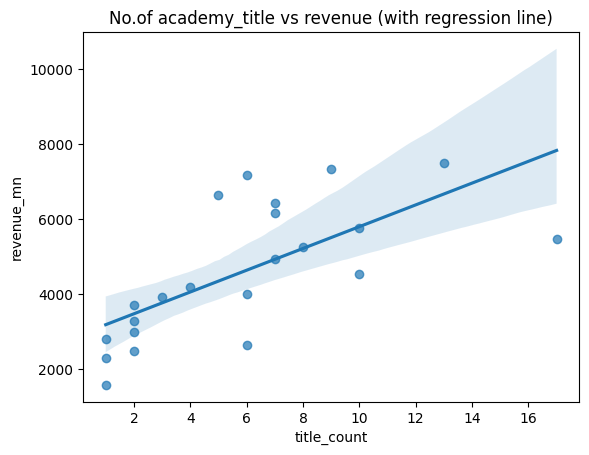

In [ ]:
r, p = pearsonr(df_aca["title_count"], df_aca["revenue_mn"])
print("Pearson correlation (r):", r)
print("P-value:", p)

sns.regplot(data=df_aca, x='title_count', y='revenue_mn', scatter_kws={'alpha':0.7})
plt.title('No.of academy_title vs revenue (with regression line)')
plt.show()

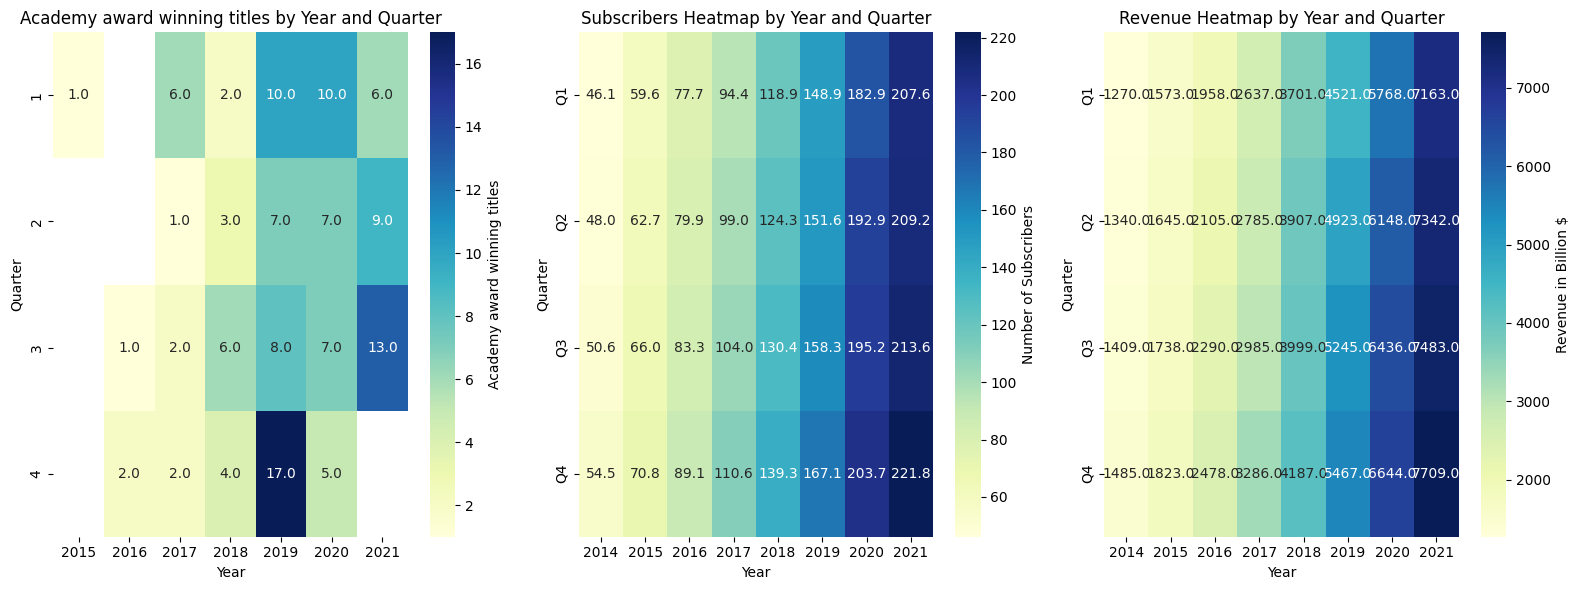

In [ ]:
df_a = plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
sns.heatmap(df_aca_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Academy award winning titles'}) # Changed 'd' to '.1f' to format floats
plt.title('Academy award winning titles by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 2)

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Number of Subscribers'}) # Changed 'd' to '.1f' to format floats
plt.title('Subscribers Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')

plt.subplot(1, 3, 3)
sns.heatmap(df_rev_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Revenue in Billion $'}) # Changed 'd' to '.1f' to format floats
plt.title('Revenue Heatmap by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Quarter')


plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

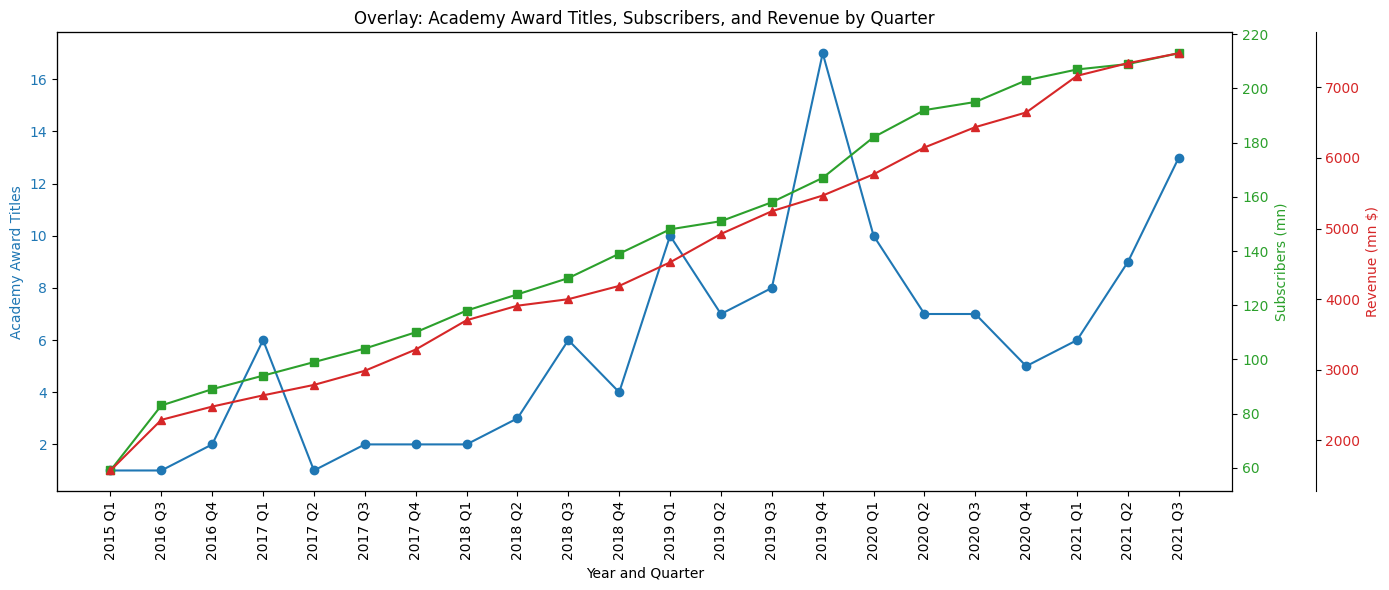

In [ ]:
df_a = df_aca.copy()
df_a['time'] = df_a['year'].astype(str) + " Q" + df_a['quarter'].astype(str)

plt.figure(figsize=(14,6))

# Primary axis (Academy Award Titles)
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.set_xlabel("Year and Quarter")
ax1.set_ylabel("Academy Award Titles", color="tab:blue")
ax1.plot(df_a['time'], df_a['title_count'], color="tab:blue", marker="o", label="Academy Award Titles")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Secondary axis (Subscribers)

ax2 = ax1.twinx()
ax2.set_ylabel("Subscribers (mn)", color="tab:green")
ax2.plot(df_a['time'], df_a['subscribers(mn)'], color="tab:green", marker="s", label="Subscribers (mn)")
ax2.tick_params(axis='y', labelcolor="tab:green")

# Third axis (Revenue)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # shift third axis outward
ax3.set_ylabel("Revenue (mn $)", color="tab:red")
ax3.plot(df_a['time'], df_a['revenue_mn'], color="tab:red", marker="^", label="Revenue (mn $)")
ax3.tick_params(axis='y', labelcolor="tab:red")

# Formatting
plt.title("Overlay: Academy Award Titles, Subscribers, and Revenue by Quarter")
ax1.set_xticks(range(len(df_a['time'])))
ax1.set_xticklabels(df_a['time'], rotation=90)

fig.tight_layout()
plt.show()

2017–2019: Spikes in Academy Award titles coincide with accelerated subscriber growth — evidence that Netflix’s investment in high-quality content might have paid off.

2020 Q1: Despite volatility in titles, both subscribers and revenue surged (pandemic effect), reinforcing that external factors also play a role.

Post-2019: Revenue rises faster than subscribers → Netflix relied on price increases (ARPU growth), not just content or subscriber additions.

Overall: Award-winning content boosted brand prestige and likely aided subscriber acquisition, but the primary drivers of revenue remained subscriber base growth and ARPU strategy.



---

### Conclusion


The highly rated titles and academy award winning titles show some increase in subscribers and revenue, so to grow the business netflix should have more highly rated titles compared to low rated titles, so it should invest in acquiring or producing good quality content.

To grow business in different countries it should make international content more easily accessible to different countries and as international movies are the most popular genre, it indicates that audiance look for variety in content rather than the content that follows the cultural and other norms of their own country only.

However, these are not the only factors, it should consider other factors like competitior's strategy and macroeconomic factors.



---
References:

Code to fetch missing director  name from omdb api, this was the basic code , modified for country , cast and other columns.

In [ ]:
# import requests

# def get_director(title, api_key):
#   url = 'http://www.omdbapi.com/'
#   params = {
#       't': title,
#       'apikey': api_key
#   }
#   response = requests.get(url, params=params)
#   if response.status_code == 200:
#       data = response.json()
#       if 'Director' in data:
#           return data['Director']
#   return None

# api_key = '######'
# movie_title = 'Movie Title' #it is list of movie
# director = get_director(movie_title, api_key)
# if director:
#   print(f'Director: {director}')
# else:
#   print('Director not found')

Han J, Kim W, Jeong E (2019) Factors affecting the intention to pay for online content among Millennials. Telematics Inform 37:135–145 https://link.springer.com/chapter/10.1007/978-981-99-7058-2_18


https://www.macrotrends.net/stocks/charts/NFLX/netflix/income-statement?freq=Q

https://ir.netflix.net/financials/quarterly-earnings/default.aspx

https://gtelocalize.com/netflix-localization/

https://www.trymito.io/excel-to-python/functions/text/TRIM

https://hbr.org/2018/10/how-netflix-expanded-to-190-countries-in-7-years.